# Modelado

# IMPORTANTE: MODIFICAR FUNCIÓN QUE DA DF CON LOS VALORES R2 Y RMSE DE CADA MODELOO Y PONERLA PARA QUE SE ORDENE AUTOMÁTICAMENTE

EXTRATEGIA QUE SE HA DECIDIDO SEGUIR:

In [1]:
# Librerías básicas
import numpy as np
import pandas as pd
import os
import joblib

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Métodos de validación y ajuste de modelos
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from scipy.stats import randint, uniform


# Modelos de regresión
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import LinearSVR
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler

# SHAP para explicación de modelos
import shap
shap.initjs()

# Importación de módulos personalizados
from modulos.data_description import *
from modulos.data_model import *
from modulos.data_visualization import *

## 1. Carga del Dataset

In [2]:
# Cargamos el dataset internal_transformed
ruta_binario = os.path.join('data', 'internal_transformed.pkl')
internal_transformed = joblib.load(ruta_binario)

# Eliminamos la variable 'Credit_Score' para que no esté duplicada
internal_transformed.drop(columns='Credit_Score', inplace=True)

In [3]:
# Cargamos el dataset external_transformed
ruta_binario = os.path.join('data', 'external_transformed.pkl')
external_transformed = joblib.load(ruta_binario)

### Unión ambos Dataset

In [4]:
# Fusión de DataFrames por PROSPECTID  
df = pd.merge(internal_transformed, external_transformed, on=['PROSPECTID'], how='inner')

### División del Dataset

In [5]:
# Separamos variable dependiente de las independientes
X = df.drop(columns=['Credit_Score', 'PROSPECTID'], inplace=False)
Y = df['Credit_Score']

# Generamos el dataset de entrenamiento y el de test
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=29, shuffle=True)

## 2. Regularización (Ridge, Lasso, ElasticNet)

### 2.1. Linear Regression

In [6]:
# Entrenamiento del modelo de regresión lineal  
linear = LinearRegression(fit_intercept=False)
linear.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

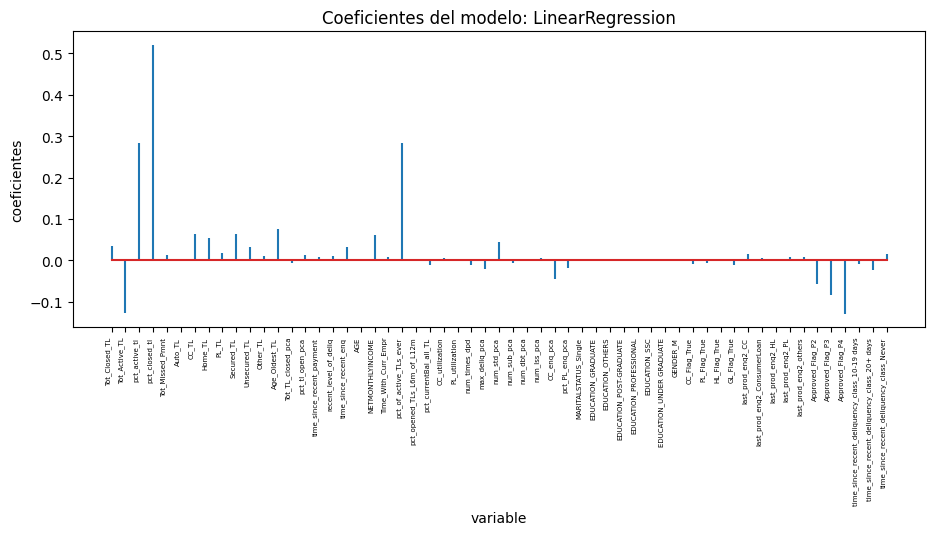

In [7]:
# Gráfico de los coeficientes del modelo  
graficar_coeficientes(linear, X_train)


In [8]:
# Evalúa el modelo entrenado con los datos de prueba
evaluar_modelos(linear, X_test, y_test)

,R^2,RMSE
LinearRegression,0.770402,0.029369


### 2.2. Ridge

In [9]:
# Entrenamiento del modelo Ridge con validación cruzada
modelo_ridge = RidgeCV(
    alphas=np.logspace(-3, 10, 200),
    store_cv_values=True,
    fit_intercept=False
).fit(X_train, y_train)

C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


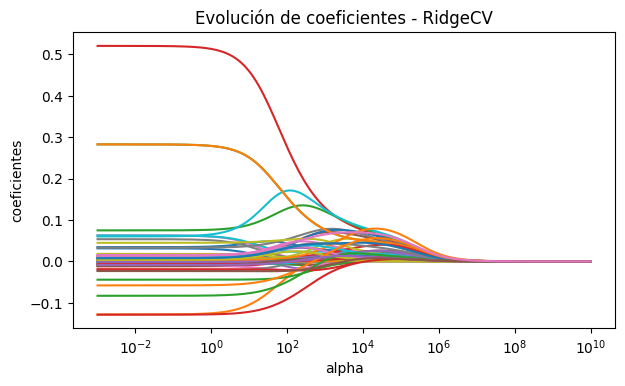

In [10]:
# Cálculo y grafico de la evolución de los coeficientes
evaluacion_coeficientes(modelo_ridge, Ridge, X_train, y_train)

C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:110: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


Mejor valor de alpha encontrado: 0.058052255160949015
Mejor valor de alpha encontrado + 1 desviación estándar: 20729.21779595374


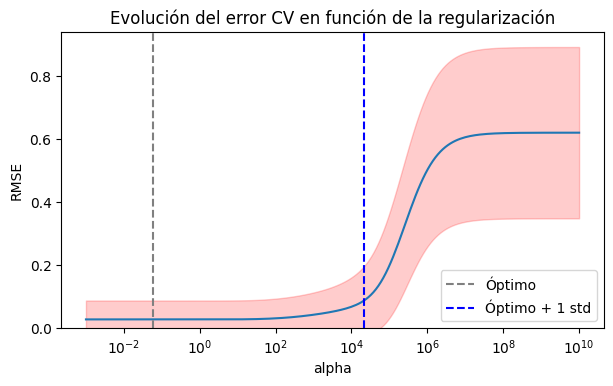

In [11]:
# Calculo y grafico mejor RMSE y su desviación estándar
optimo_ridge = graficar_error_cv(modelo_ridge)

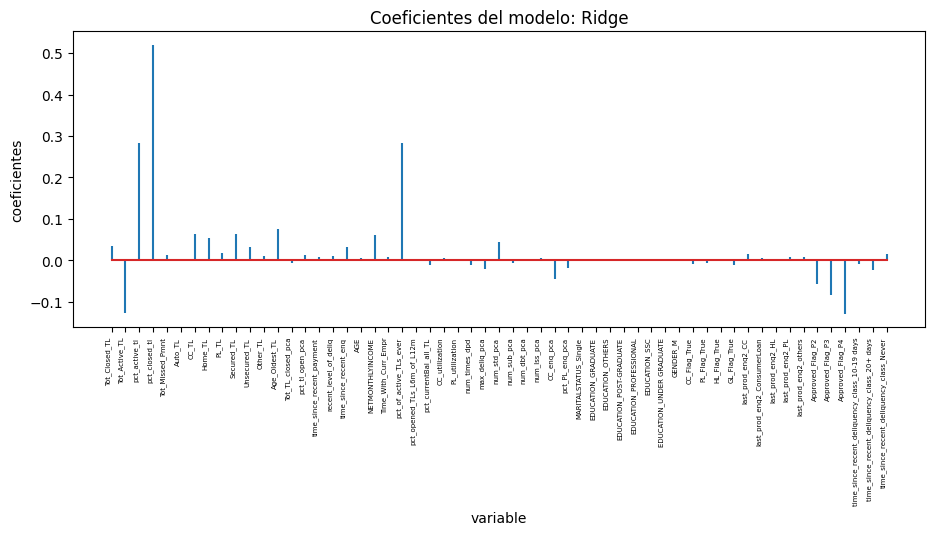

In [12]:
# Entrenamiento del modelo Ridge final con el alpha seleccionado
modelo_ridge_final = Ridge(alpha=optimo_ridge, fit_intercept=False).fit(X_train, y_train)

# Gráfico de los coeficientes del modelo  
graficar_coeficientes(modelo_ridge_final, X_train)

In [13]:
# Evalúa el modelo entrenado con los datos de prueba
evaluar_modelos(modelo_ridge_final, X_test, y_test)

,R^2,RMSE
LinearRegression,0.770402,0.029369
Ridge,0.770399,0.029369


### 2.3. Lasso

In [14]:
# Entrenamiento del modelo Lasso con validación cruzada
modelo_lasso = LassoCV(
    alphas=np.logspace(-10, 3, 100), 
    cv=3, 
    fit_intercept=False,
).fit(X_train, y_train)

C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+01, tolerance: 1.576e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Cálculo y grafico de la evolución de los coeficientes
evaluacion_coeficientes(modelo_lasso, Lasso, X_train, y_train)

C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.563e+01, tolerance: 1.576e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.563e+01, tolerance: 1.576e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

Mejor valor de alpha encontrado: 1.592282793341094e-06
Mejor valor de alpha encontrado + 1 desviación estándar: 0.0006734150657750829


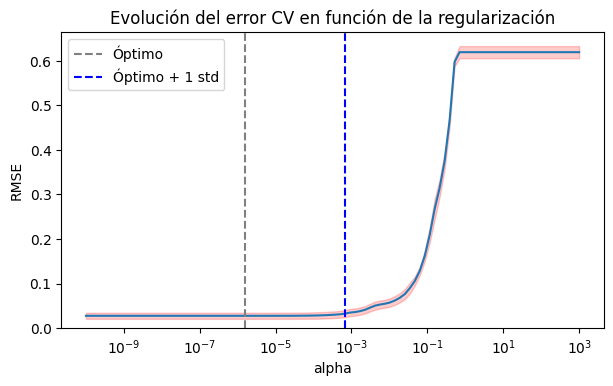

In [ ]:
# Calculo y grafico mejor RMSE y su desviación estándar
optimo_lasso = graficar_error_cv(modelo_lasso)

C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+01, tolerance: 1.576e+00
  model = cd_fast.enet_coordinate_descent(


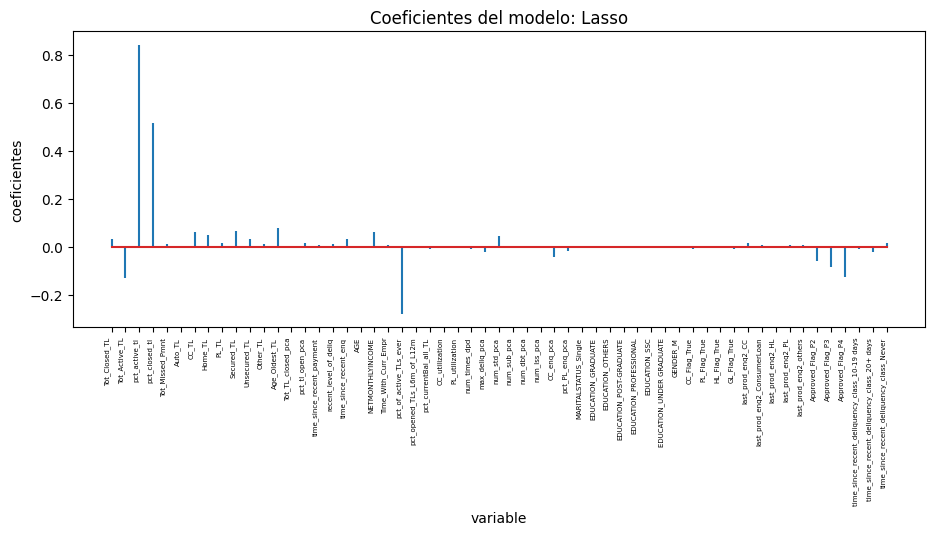

In [ ]:
# Entrenamiento del modelo Lasso final con el alpha seleccionado
modelo_lasso_final = Lasso(alpha=optimo_lasso, fit_intercept=False).fit(X_train, y_train)

# Gráfico de los coeficientes del modelo  
graficar_coeficientes(modelo_lasso_final, X_train)

In [ ]:
# Evalúa el modelo entrenado con los datos de prueba
evaluar_modelos(modelo_lasso_final, X_test, y_test)

,R^2,RMSE
LinearRegression,0.770402,0.029369
Ridge,0.770399,0.029369
Lasso,0.770340,0.029373


### 2.4. Elastic Net

In [ ]:
# ElasticNetCV - Ajuste y selección de alpha óptimo
modelo_elastic = ElasticNetCV(
    l1_ratio=[0, 0.1, 0.4, 0.5, 0.7, 0.9, 0.99],
    alphas=np.logspace(-8, 3, 100),
    cv=3,
    fit_intercept=False,  
).fit(X_train, y_train)

C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5224.101283604304, tolerance: 1.0508547989124857
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:681: UserWar

C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.562e+01, tolerance: 1.576e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.561e+01, tolerance: 1.576e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

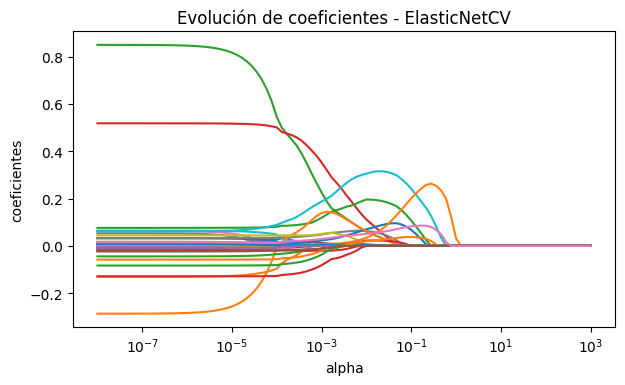

In [ ]:
# Cálculo y grafico de la evolución de los coeficientes
evaluacion_coeficientes(modelo_elastic, ElasticNet, X_train, y_train)

In [ ]:
# Cálculo del error medio cuadrático (MSE) y desviación estándar en validación cruzada
mse_cv = modelo_elastic.mse_path_.mean(axis=2)
mse_sd = modelo_elastic.mse_path_.std(axis=2)

# Cálculo del error cuadrático medio (RMSE) y su desviación estándar
rmse_cv, rmse_sd = np.sqrt(mse_cv), np.sqrt(mse_sd)

# Selección de los índices óptimos para el mejor valor de L1 y alpha
best_l1_idx, best_alpha_idx = np.unravel_index(np.argmin(rmse_cv), rmse_cv.shape)

# Selección del mejor valor de alpha y el valor de alpha + 1 desviación estándar
optimo_elastic, optimo_elastic_1sd = seleccionar_alpha_optimo(
    rmse_cv[best_l1_idx, :], rmse_sd[best_l1_idx, :], modelo_elastic.alphas_)

In [ ]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = modelo_elastic.mse_path_.mean(axis=2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha), se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [modelo_elastic.l1_ratio, modelo_elastic.alphas_],
                                    names     = ['l1_ratio', 'modelo_elastic.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

# Cálculo del RMSE a partir del MSE
df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])

# Ordenación de los resultados por MSE en orden ascendente
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending=True)

# Visualización del dataframe con los resultados
df_resultados_cv

,l1_ratio,modelo_elastic.alphas_,mse_cv,rmse_cv
579,0.90,0.000002,0.000765,0.027667
679,0.99,0.000002,0.000765,0.027667
680,0.99,0.000001,0.000765,0.027667
580,0.90,0.000001,0.000765,0.027667
478,0.70,0.000002,0.000765,0.027667
...,...,...,...,...
402,0.70,599.484250,0.383779,0.619499
403,0.70,464.158883,0.383779,0.619499
404,0.70,359.381366,0.383779,0.619499
405,0.70,278.255940,0.383779,0.619499


In [ ]:
# Impresión del mejor valor de alpha y l1_ratio encontrados
print(f"Mejor valor de alpha encontrado: {modelo_elastic.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo_elastic.l1_ratio_}")

Mejor valor de alpha encontrado: 1.6681005372000591e-06
Mejor valor de l1_ratio encontrado: 0.9


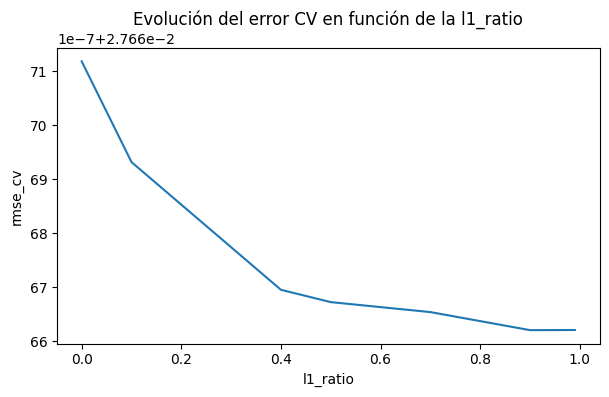

In [ ]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))

# Graficar el mejor valor de RMSE para cada l1_ratio
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax=ax)

# Configuración del gráfico
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.336e+01, tolerance: 1.576e+00
  model = cd_fast.enet_coordinate_descent(


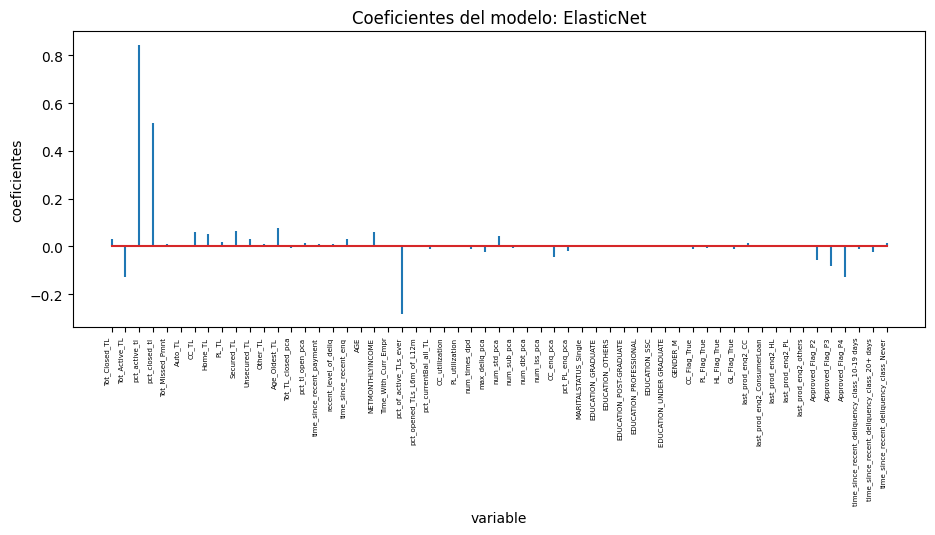

In [ ]:
# Ajuste del modelo ElasticNet final con el valor óptimo de alpha
modelo_elastic_final = ElasticNet(alpha=optimo_elastic, fit_intercept=False).fit(X_train, y_train)

# Gráfico de los coeficientes del modelo  
graficar_coeficientes(modelo_elastic_final, X_train)

In [ ]:
# Evalúa el modelo entrenado con los datos de prueba
evaluar_modelos(modelo_elastic_final, X_test, y_test)

,R^2,RMSE
LinearRegression,0.770402,0.029369
Ridge,0.770399,0.029369
Lasso,0.770340,0.029373
ElasticNet,0.770373,0.029371


## 3. Regresión Lineal 

Debido a que la Regresión Lineal por si misma arroja unos mejores resultados que las regularizaciones procedemos a seleccionarla para estudiar sus valores SHAP

In [ ]:
# Crear el explicador de SHAP para el mejor modelo de regresión lineal
explainer = shap.LinearExplainer(
    model=linear, 
    masker=shap.maskers.Independent(X_train),
    feature_perturbation='interventional')

# Obtener valores SHAP en formato Explanation
shap_values = explainer(X_test)

C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\shap\explainers\_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [ ]:
# Representamos todas las gráficas que hemos decidico representar de la librerís SHAP
shap_visualization(shap_values, X_test)

**shap.force_plot** no admite múltiples muestras con matplotlib, por lo que podría ser necesario recorrer varias observaciones individualmente

In [ ]:
# Force Plot: Explicación visual de hasta 50 observaciones  
shap.force_plot(shap_values[:50])

## 4. K-Nearest Neighbours (KNN)

In [ ]:
# Definir el rango de valores de k a evaluar
param_grid = {'n_neighbors': range(1, 30)}

# Crear el modelo kNN para regresión
knn = KNeighborsRegressor()

# Configurar GridSearchCV con validación cruzada de 5 folds
grid_search = GridSearchCV(
    knn, 
    param_grid, 
    cv=5, 
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    n_jobs=-1
)

# Ajustar el modelo en los datos de entrenamiento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 30)},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'))

In [ ]:
# Obtener el mejor modelo entrenado tras la búsqueda de hiperparámetros
best_knn = grid_search.best_estimator_

# Imprimime mejores hiperparámetros
df_best_params(grid_search)


Mejores hiperparámetros encontrados:
  Hiperparámetro  Valor
0    n_neighbors     13


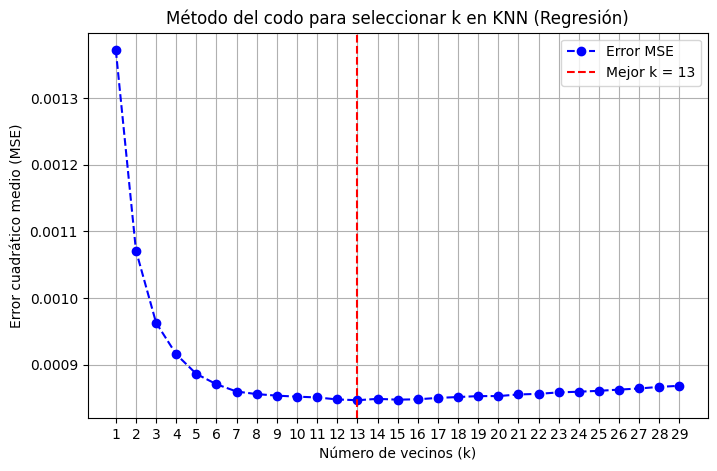

In [ ]:
# Obtener la evolución del error en función de k
k_values = param_grid['n_neighbors']
errors = -grid_search.cv_results_['mean_test_score']
best_k = grid_search.best_params_['n_neighbors']

# Graficar la evolución del error
plt.figure(figsize=(8, 5))
plt.plot(k_values, errors, marker='o', linestyle='dashed', color='b', label="Error MSE")
plt.axvline(best_k, linestyle="--", color="r", label=f"Mejor k = {best_k}")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title("Método del codo para seleccionar k en KNN (Regresión)")
plt.xticks(k_values)
plt.legend()
plt.grid()

In [ ]:
# Usar K-Means para agrupar y reducir los datos de referencia a 50 centroides
background_kmeans = shap.kmeans(X_train, 50)
background_kmeans_array = np.array(background_kmeans.data)

# Crear el explicador con el conjunto reducido
explainer = shap.KernelExplainer(
    model=best_knn.predict,
    data=background_kmeans_array,
    masker=shap.maskers.Independent(background_kmeans_array)
)

# Obtener valores SHAP para las primeras 10 muestras de prueba
shap_values = explainer(X_test.iloc[0:20, :])

NameError: name 'best_knn' is not defined

In [ ]:
# Representamos todas las gráficas que hemos decidico representar de la librerís SHAP
shap_visualization(shap_values, X_test)

In [ ]:
# Force Plot: Explicación visual de hasta 50 observaciones  
shap.force_plot(shap_values[:50])

In [ ]:
# Evalúa el modelo entrenado con los datos de prueba
evaluar_modelos(best_knn, X_test, y_test)

,R^2,RMSE
KNeighborsRegressor,0.746412,0.030865


## 5. Modelos basados en árboles de decisión

### 5.1. Árbol de decisión

In [ ]:
# Definir el rango de hiperparámetros
param_dist = {
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': range(8, 17, 1),
    'min_samples_split': [10, 15, 20],
    'max_features': ['sqrt', 'log2']
}

# Crear el modelo de árbol de decisión para regresión
tree = DecisionTreeRegressor()

# Configurar GridSearchCV con validación cruzada de 3 folds
random_search = RandomizedSearchCV(
    tree, 
    param_distributions=param_dist,  
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',  
    n_jobs=-1,  
    random_state=29,  
    verbose=1  
)

# Ajustar el modelo en los datos de entrenamiento
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse'],
                                        'max_depth': range(8, 17),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [10, 15, 20]},
                   random_state=29, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
# Obtener el mejor modelo
best_tree = random_search.best_estimator_

# Imprimime mejores hiperparámetros
df_best_params(random_search)


Mejores hiperparámetros encontrados:
      Hiperparámetro          Valor
0  min_samples_split             20
1       max_features           sqrt
2          max_depth             14
3          criterion  squared_error


In [ ]:
# Evalúa el modelo entrenado con los datos de prueba
evaluar_modelos(best_tree, X_test, y_test)

,R^2,RMSE
KNeighborsRegressor,0.746412,0.030865
DecisionTreeRegressor,0.665450,0.035452


### 5.2. Random Forest

In [ ]:
# Definir el modelo
forest = RandomForestRegressor()

# Definir la parrilla de hiperparámetros
param_dist = {
    'n_estimators': randint(100, 1000),
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2']
}

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=forest,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=29,
    n_jobs=-1
)

# Ejecutar la búsqueda
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000190E14B6F10>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000190E1216FD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000190E15556D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000190E125AF10>},
                   random_state=29, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
# Obtener el mejor modelo
best_forest = random_search.best_estimator_

# Imprimime mejores hiperparámetros
df_best_params(random_search)


Mejores hiperparámetros encontrados:
      Hiperparámetro          Valor
0          criterion  squared_error
1          max_depth              9
2       max_features           sqrt
3   min_samples_leaf             15
4  min_samples_split              5
5       n_estimators            366


In [ ]:
# Evalúa el modelo entrenado con los datos de prueba
evaluar_modelos(best_forest, X_test, y_test)

,R^2,RMSE
RandomForestRegressor,0.800855,0.027352
KNeighborsRegressor,0.746412,0.030865
DecisionTreeRegressor,0.665450,0.035452


### 5.3. XGBoost

In [ ]:
# Definir el modelo
xgb = xgb.XGBRegressor(tree_method='hist', objective='reg:squarederror')

# Definir la parrilla de hiperparámetros
param_dist = {
    'n_estimators': randint(200, 1200),
    'learning_rate': uniform(0.005, 0.3),
    'max_depth': randint(4, 15),
    'min_child_weight': randint(1, 15),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 15),
    'reg_alpha': uniform(0, 2),
    'reg_lambda': uniform(0, 2)
}

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=29,
    n_jobs=-1
)

# Ejecutar la búsqueda
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000190E13690D0>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000190E15EA750>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000190E15EBE50>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000190DB50D210>},
                   random_state=29, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
# Obtener el mejor modelo
best_xgb = random_search.best_estimator_

# Imprimime mejores hiperparámetros
df_best_params(random_search)


Mejores hiperparámetros encontrados:
     Hiperparámetro        Valor
0  colsample_bytree     0.665290
1             gamma     0.234778
2     learning_rate     0.302431
3         max_depth     9.000000
4  min_child_weight     1.000000
5      n_estimators  1160.000000
6         reg_alpha     0.730427
7        reg_lambda     1.176509
8         subsample     0.873368


In [ ]:
# Evalúa el modelo entrenado con los datos de prueba
evaluar_modelos(best_xgb, X_test, y_test)

,R^2,RMSE
XGBRegressor,0.818641,0.026102
RandomForestRegressor,0.800855,0.027352
KNeighborsRegressor,0.746412,0.030865
DecisionTreeRegressor,0.665450,0.035452


### 5.4. SHAP Tree Model

Como el modelo basado en árboles que mejor predicción ha arrojado es el entrenado con XGBoost, escogemos a este para analizar sus valores SHAP.

In [ ]:
# Crear el explicador de SHAP para el mejor modelo de árbol de decisión
explainer = shap.TreeExplainer(
    model=best_xgb,
    data=X_train,
    model_output='raw',
    feature_perturbation='interventional')

# Obtener los valores SHAP para todo el conjunto de prueba
shap_values = explainer(X_test)

 99%|===================| 10124/10268 [00:11<00:00]       

In [ ]:
# Representamos todas las gráficas que hemos decidico representar de la librerís SHAP
shap_visualization(shap_values, X_test)

In [ ]:
# Force Plot: Explicación visual de hasta 50 observaciones  
shap.force_plot(shap_values[:50])

## 6. SVM

In [ ]:
# Definir el modelo
svr = LinearSVR()

# Definir la parrilla de hiperparámetros
param_dist = {
    'C': uniform(0.1, 10),
    'epsilon': uniform(0.01, 1),
    'max_iter': randint(100, 1000)
}

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist,
    n_iter=200,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=29,
    n_jobs=-1
)

# Ejecutar la búsqueda
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearSVR(), n_iter=200, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000190E1641F50>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000190E19F7850>,
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000190E175EB10>},
                   random_state=29, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
# Obtener el mejor modelo
best_svr = random_search.best_estimator_

# Imprimime mejores hiperparámetros
df_best_params(random_search)


Mejores hiperparámetros encontrados:
  Hiperparámetro       Valor
0              C    0.154085
1        epsilon    0.038436
2       max_iter  679.000000


In [ ]:
# Crear el explicador SHAP para SVR
explainer = shap.KernelExplainer(
    model=best_svr.predict,  # SVR necesita .predict()
    data=X_train[:100],
    link="identity"  # Relación directa entre salida y SHAP values
)

# Calcular valores SHAP para un subconjunto de datos de prueba
shap_values = explainer(X_test[:100]) 

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# Representamos todas las gráficas que hemos decidico representar de la librerís SHAP
shap_visualization(shap_values, X_test)

In [ ]:
# Force Plot: Explicación visual de hasta 50 observaciones  
shap.force_plot(shap_values[:50])

In [ ]:
# Evalúa el modelo entrenado con los datos de prueba
evaluar_modelos(best_svr, X_test, y_test)

,R^2,RMSE
XGBRegressor,0.818641,0.026102
RandomForestRegressor,0.800855,0.027352
LinearSVR,0.798933,0.027484
KNeighborsRegressor,0.746412,0.030865
DecisionTreeRegressor,0.665450,0.035452


## 7. Red Neuronal Multicapa

In [ ]:
# Función para el ajuste de la tasa de aprendizaje
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.95

# Crear el modelo
dense = Sequential()

# Capa de entrada con normalización y activación LeakyReLU
dense.add(Input(shape=(X_train.shape[1],)))
dense.add(Dense(256, kernel_regularizer=l2(0.005)))
dense.add(BatchNormalization()) 
dense.add(LeakyReLU(negative_slope=0.01))

# Capas ocultas con activación LeakyReLU y BatchNormalization
dense.add(Dense(128, kernel_regularizer=l2(0.005)))
dense.add(BatchNormalization())
dense.add(LeakyReLU(negative_slope=0.01))

dense.add(Dense(128, kernel_regularizer=l2(0.005)))
dense.add(BatchNormalization())
dense.add(LeakyReLU(negative_slope=0.01))

# Dropout para evitar sobreajuste
dense.add(Dropout(0.3))

# Capa de salida (regresión)
dense.add(Dense(1, activation="linear"))

# Compilar el modelo con el optimizador Adam
optimizer = Adam(learning_rate=0.001)
dense.compile(optimizer=optimizer, loss="mse", metrics=["mean_squared_error"])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_callback = LearningRateScheduler(lr_scheduler)

# Entrenamiento del modelo
history = dense.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, 
                  batch_size=128, callbacks=[early_stopping, lr_callback])

Epoch 1/100


LookupError: gradient registry has no entry for: shap_Sum

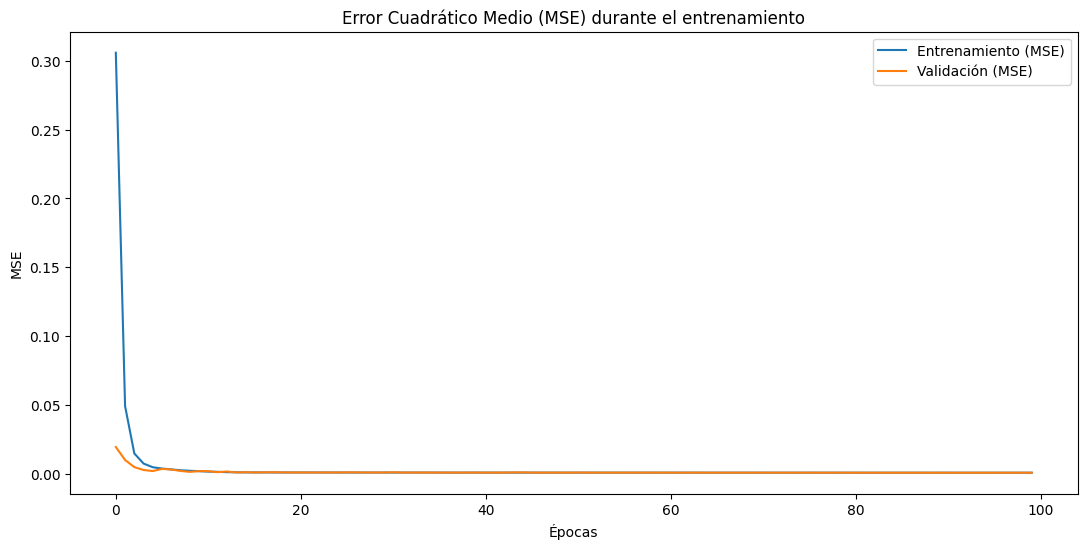

In [ ]:
# Graficar los valores de error absoluto medio durante el entrenamiento
plt.figure(figsize=(13,6))
plt.plot(history.history['mean_squared_error'], label='Entrenamiento (MSE)')
plt.plot(history.history['val_mean_squared_error'], label='Validación (MSE)')
plt.title('Error Cuadrático Medio (MSE) durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [82]:
# Ajustar la forma de X_train y X_test
X_train_array = X_train.to_numpy()  # No necesitas reshape aquí
X_test_array = X_test.to_numpy()[:10]  # Usar las primeras 10 observaciones


# Crear el explicador
explainer = shap.GradientExplainer(dense, X_train_array)

# Calcular los valores SHAP
shap_values = explainer.shap_values(X_test_array)

# # Visualizar los valores SHAP
# shap.summary_plot(shap_values, X_test_array)

# # Usar KernelExplainer como alternativa
# explainer = shap.Explainer(dense.predict, X_train_array)
# shap_values = explainer.shap_values(X_test_array)

# # Visualizar los valores SHAP
# shap.summary_plot(shap_values, X_test_array)


NameError: name 'dense' is not defined

In [ ]:
explainer = shap.DeepExplainer(dense, X_train_array)
shap_values = explainer.shap_values(X_test_array)

C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\shap\explainers\_deep\deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance consider using smaller random sample.
  warnings.warn("You have provided over 5k background samples! For better performance consider using smaller random sample.")
C:\Users\Ismael L

StagingError: in user code:

    File "C:\Users\Ismael Laso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\shap\explainers\_deep\deep_tf.py", line 269, in grad_graph  *
        x_grad = tape.gradient(out, shap_rAnD)

    LookupError: gradient registry has no entry for: shap_LeakyRelu


In [ ]:
# # Definir una función de predicción que reciba las características correctamente
# def f(X):
#     return dense.predict(X).flatten() 

# # Crear el explicador usando GradientExplainer
# explainer = shap.GradientExplainer(f, X_train[:50])

# # Calcular los valores SHAP
# shap_values = explainer.shap_values(X_test[:10])

ValueError: <class 'function'> is not currently a supported model type!

In [70]:
X_test_array = X_test[:10].to_numpy()
X_test_array = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))  # Asegurar la forma correcta

shap_values = explainer.shap_values(X_test_array)  # Ejecutar de nuevo

ValueError: could not broadcast input array from shape (57,57) into shape (57,1)

In [72]:
# Ajustar X_test_array de manera similar
X_test_array = X_test[:10].to_numpy().reshape((X_test[:10].shape[0], X_test.shape[1], 1))  # Añadir la tercera dimensión
print("Forma de X_test_array:", X_test_array.shape)  # Debería ser (10, 57, 1)


Forma de X_test_array: (10, 57, 1)


In [ ]:
    # Waterfall Plot: Explicación detallada para una sola observación  
shap.plots.waterfall(shap_values[0])

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

In [48]:
# Explicación de predicciones para más de una muestra
shap.force_plot(explainer.expected_value, shap_values[:100, :], features=X_test.iloc[:100, :])

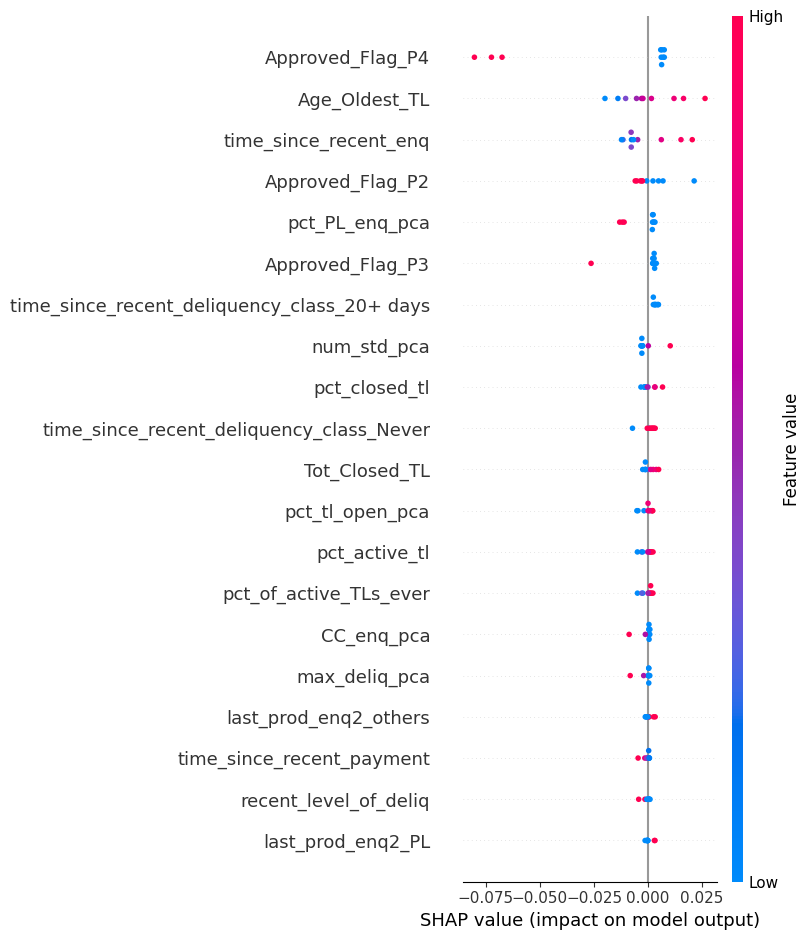

In [49]:
# Explicamos la influencia de los valores SHAP para una predicción
shap.summary_plot(shap_values, X_test[:10])

In [ ]:
# Evalúa el modelo entrenado con los datos de prueba
evaluar_modelos(dense, X_test, y_test)

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,R^2,RMSE
Sequential,0.847432,0.023941
XGBRegressor,0.818641,0.026102
RandomForestRegressor,0.800855,0.027352
LinearSVR,0.798933,0.027484
KNeighborsRegressor,0.746412,0.030865
DecisionTreeRegressor,0.665450,0.035452
